In [3]:
import numpy as np
import os
import tensorflow as tf
from keras import optimizers
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense, Flatten, Reshape, Dropout
from keras.layers import Convolution1D, MaxPooling1D, BatchNormalization
from keras.layers import Lambda
from keras.models import Model, load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import imshow
import h5py
import matplotlib.cm as cm
from cycler import cycler
import input_Tnet
import feature_Tnet

# Pointnet Model

In [12]:
# number of points in each sample
num_points =2048

# number of categories
k = 40

#  Pointnet Architecture
adam = optimizers.Adam(lr=0.001, decay=0.7)
input_points = Input(shape=(num_points, 3))

# T_net(transformation_net)
input_T = input_Tnet.Input_Tnet(num_points, input_points)

# Foward_net
fw = feature_Tnet.forward_net(input_T, input_points, num_points)

# T_net(transformation_net)
feature_T = feature_Tnet.feature_Tnet(fw, num_points)

# Forward net_v2
fw_v2 = feature_Tnet.forward_net_v2(feature_T, fw)

# Golobal_features
global_feature = MaxPooling1D(pool_size=num_points)(fw_v2)

# Convert pointnet to make prediction
a = Dense(512, activation='relu')(global_feature)
a = BatchNormalization()(a)
a = Dropout(rate=0.7)(a)
a = Dense(256, activation='relu')(a)
a = BatchNormalization()(a)
a = Dropout(rate=0.7)(a)
a = Dense(k, activation='softmax')(a)
prediction = Flatten()(a)


PN_model = Model(inputs=input_points, outputs=prediction)
print(PN_model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2048, 3)           0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 2048, 3)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 2048, 64)          256       
_________________________________________________________________
batch_normalization_23 (Batc (None, 2048, 64)          256       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 2048, 64)          4160      
_________________________________________________________________
batch_normalization_24 (Batc (None, 2048, 64)          256       
_________________________________________________________________
lambda_4 (Lambda)            (None, 2048, 64)          0         
__________

In [13]:
PN_model.load_weights('./model_pn1.h5')

In [15]:
predicted_m = np.load('predict_pn1.npy')

In [16]:
predicted_m.shape

(2468, 40)

In [17]:
test_p = np.load('test_point1.npy')

In [18]:
test_p.shape

(2468, 2048, 3)

# Find distinct objects

In [25]:
#Finddistinct objects
l_index = []
s_index = []
i = 0
count = 1
while count != 40:
    if (np.argmax(predicted_m[i,:]) not in (l_index)) :
        l_index.append(np.argmax(predicted_m[i,:]))
        s_index.append(i)
        count = count + 1
    i = i + 1



In [26]:
f = open('shape_names.txt', 'r')
x = f.readlines()
f.close()

In [27]:
x[1]

'bathtub\n'

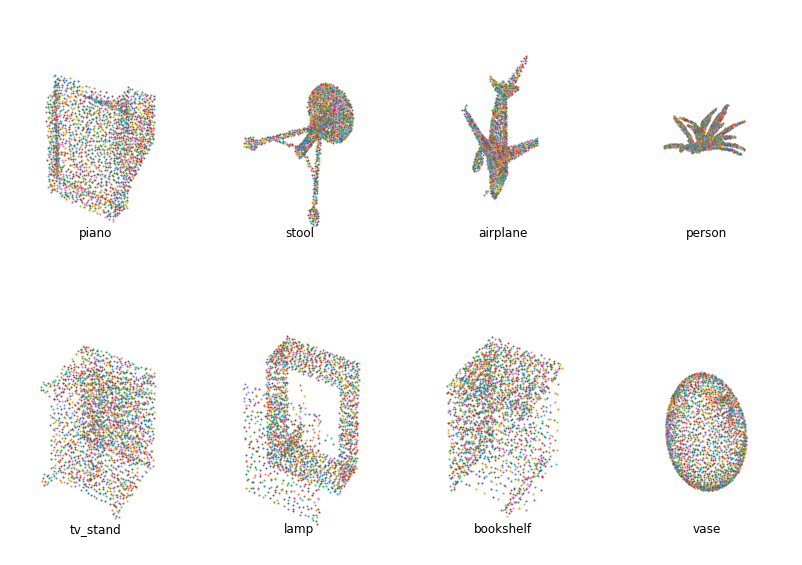

In [ ]:
# Plot 40 distict objects and it label

count = 1
k = 0
for j in range(1,5):
    count = 1
    fig = plt.figure(figsize=(14, 10))
    for i in s_index[j*8 - 8:j*8]:
        ax = fig.add_subplot(2,4,count,    projection='3d')
        v_points = test_p[s_index[k]:s_index[k]+1 ,:,:]
        count = count + 1
        p = PN_model.predict(v_points)
        l = np.argmax(p)
        k = k + 1
        for i in range(v_points.shape[1]):
            xs = v_points[0, i, 0]
            ys = v_points[0, i, 1]
            zs = v_points[0, i, 2]
            ax.scatter(xs, ys, zs, s=1)
            ax.set_title(x[l])
            ax.prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +cycler('linestyle', ['-', '--', ':', '-.']))
            ax.axis('off')
    plt.show()
    fig.savefig(str(j) + '.jpg')
    fig.clear('all')

In [109]:
print(matplotlib.__version__)


2.2.3
